In [26]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import alphashape
from descartes import PolygonPatch
import numpy as np
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})
path="/home/alguero/Work/smodelsv2-paper/IDM-Scoto/scalar_DM_scenario/plots"
df = pd.read_csv("scalarData.csv")
fer = pd.read_csv("scalarDataFermions.csv")
simple = pd.read_csv("simplescanData.csv")
df['topo'] = df['topo'].apply(lambda x: x.replace("'", ""))
df['topo'] = df['topo'].apply(lambda x: x.replace("[", ""))
df['topo'] = df['topo'].apply(lambda x: x.replace("]", ""))
df=df.sort_values(by='rmax', ascending=True)
simple

,mA0,mHc,mH0,deltaM,dHc,rmax,ana,rmaxDT,rmaxHSCP,topo,bestTx,pions,slha
0,270.00,220.0,219.8,0.2,0.158489,1.015621,ATLAS-SUSY-2016-06,1.015621,1.033020e-06,"['TDTM1S', 'TDTM2S']",TDTM1S,True,IDMsimple_mhc_220_dm_50_logctau_8_.slha
1,330.00,230.0,229.8,0.2,0.025119,0.171877,ATLAS-SUSY-2016-06,0.171877,8.029933e-07,"['TDTM1S', 'TDTM2S']",TDTM1S,True,IDMsimple_mhc_230_dm_100_logctau_16_.slha
2,184.99,180.0,179.8,0.2,0.079433,2.437691,ATLAS-SUSY-2016-06,2.437691,8.150270e-07,"['TDTM1S', 'TDTM2S']",TDTM1S,True,IDMsimple_mhc_180_dm_5_logctau_11_.slha
3,250.00,150.0,149.8,0.2,0.100000,2.605775,ATLAS-SUSY-2016-06,2.605775,1.585520e-06,"['TDTM1S', 'TDTM2S']",TDTM1S,True,IDMsimple_mhc_150_dm_100_logctau_10_.slha
4,300.00,200.0,199.8,0.2,0.316228,1.121863,ATLAS-SUSY-2016-06,1.121863,7.819886e-06,"['TDTM1S', 'TDTM2S']",TDTM1S,True,IDMsimple_mhc_200_dm_100_logctau_5_.slha
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3070,330.00,230.0,229.8,0.2,0.050119,0.516148,ATLAS-SUSY-2016-06,0.516148,8.180005e-07,"['TDTM1S', 'TDTM2S']",TDTM1S,True,IDMsimple_mhc_230_dm_100_logctau_13_.slha
3071,325.00,275.0,274.8,0.2,0.158489,0.525645,ATLAS-SUSY-2016-06,0.525645,4.280289e-07,"['TDTM1S', 'TDTM2S']",TDTM1S,True,IDMsimple_mhc_275_dm_50_logctau_8_.slha
3072,255.00,205.0,204.8,0.2,0.199526,1.213502,ATLAS-SUSY-2016-06,1.213502,1.407649e-06,"['TDTM1S', 'TDTM2S']",TDTM1S,True,IDMsimple_mhc_205_dm_50_logctau_7_.slha
3073,194.99,190.0,189.8,0.2,0.039811,1.172217,ATLAS-SUSY-2016-06,1.172217,7.866326e-07,"['TDTM1S', 'TDTM2S']",TDTM1S,True,IDMsimple_mhc_190_dm_5_logctau_14_.slha


In [3]:
excl = df[df['rmax'] > 1]
compressed = excl[excl['mA0']-excl['mHc']<5]
df = df[df['mA0']-df['mHc']>5]
fer = fer[fer['mA0']-fer['mHc']>5]
ald = df[~(df['rmax'] > 1)]
near = df[(0.5 < df['rmax']) & (df['rmax'] < 1.)]
dt = df[df['rmaxDT']>1]
atlas = dt[dt.ana.str.contains('ATLAS')]
dtf = fer[fer['rmaxDT']>1]
cms = dtf[dtf.ana.str.contains('CMS')]
atlasf = fer[((fer.ana.str.contains('ATLAS-SUSY-2016-06')) & (fer['rmax'] > 1)) | ((fer.ana2.str.contains('ATLAS-SUSY-2016-06')) & (fer['rmax2'] > 1))]
hscp = df[df['rmaxHSCP']>1]
analyses = excl.ana.unique()
topos = excl.bestTx.unique()
dtf

,mA0,mHc,mH0,deltaM,dHc,rmax,ana,rmax2,ana2,rmaxDT,rmaxHSCP,topo,bestTx,pions,slha
3,215.3913,161.1239,160.9843,0.1396,6.400029,4.235900,CMS-EXO-13-006,1.929840,ATLAS-SUSY-2016-32,1.645499,4.235900e+00,"['THSCPM1b', 'THSCPM2b', 'THSCPM8', 'THSCPM9']",THSCPM2b,False,idm-batch9-pt-1614.slha
20,194.8494,163.7547,163.6103,0.1444,0.711640,6.859412,CMS-EXO-19-010,0.969082,ATLAS-SUSY-2016-06,6.859412,1.891964e-03,"['TDTM1F', 'TDTM2F']",TDTM1F,True,idm-batch1-pt-3192.slha
37,390.2099,311.8026,311.6612,0.1414,1.225731,1.052249,CMS-EXO-19-010,0.138806,ATLAS-SUSY-2016-06,1.052249,7.642328e-03,"['TDTM1F', 'TDTM2F']",TDTM1F,True,idm-batch6-pt-3278.slha
41,187.5328,170.7407,170.5858,0.1549,0.337185,6.143447,CMS-EXO-19-010,1.273985,ATLAS-SUSY-2016-06,6.143447,2.943936e-06,"['TDTM1F', 'TDTM2F']",TDTM1F,True,idm-batch2-pt-1107.slha
42,201.7341,151.0658,150.8979,0.1679,0.207224,6.333118,CMS-EXO-19-010,1.902200,ATLAS-SUSY-2016-06,6.333118,1.532676e-06,"['TDTM1F', 'TDTM2F']",TDTM1F,True,idm-batch1-pt-157.slha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29189,138.2667,113.5008,113.2483,0.2525,0.040597,1.764703,ATLAS-SUSY-2016-06,0.926911,CMS-EXO-19-010,1.764703,1.153422e-06,"['TDTM1F', 'TDTM2F']",TDTM2F,True,idm-batch2-pt-4793.slha
29196,239.0096,214.2812,214.1383,0.1429,0.869529,3.440381,CMS-EXO-19-010,0.461489,ATLAS-SUSY-2016-06,3.440381,3.721126e-03,"['TDTM1F', 'TDTM2F']",TDTM1F,True,idm-batch6-pt-2074.slha
29200,227.1454,175.1443,175.0047,0.1396,6.402330,6.411674,CMS-EXO-13-006,3.306583,ATLAS-SUSY-2016-32,1.337597,6.411674e+00,"['THSCPM1b', 'THSCPM2b', 'THSCPM8', 'THSCPM9']",THSCPM2b,False,idm-batch8-pt-1662.slha
29206,234.2764,203.7436,203.5625,0.1811,0.143967,2.011628,CMS-EXO-19-010,0.912485,ATLAS-SUSY-2016-06,2.011628,5.147423e-07,"['TDTM1F', 'TDTM2F']",TDTM1F,True,idm-batch2-pt-3782.slha


In [4]:
tot = df.shape[0]
for ana in analyses:
    part = df[df['ana'] == ana].shape[0]
    percent = part/tot
    print(ana, percent*100)

ATLAS-SUSY-2016-32 28.80479661077801
CMS-EXO-13-006 36.8865113273256
ATLAS-SUSY-2016-06 34.30869206189639


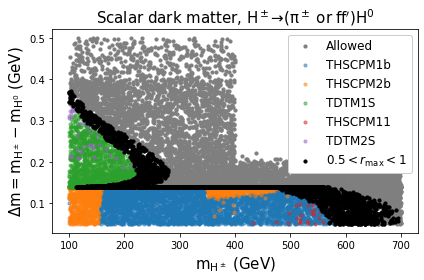

In [5]:
plt.figure(figsize=(6,4))
plt.scatter(ald['mHc'], ald['deltaM'], color='tab:grey', label="Allowed", s=10)
# plt.scatter(excl['deltaM'], excl['mHc'])
for topo in topos:
    toplot = excl[excl['bestTx']==topo]
    label = topo
    plt.scatter(toplot['mHc'], toplot['deltaM'], label=label, s=10, alpha=0.5)
plt.scatter(near['mHc'], near['deltaM'], color='black', label=r"$0.5<r_{\rm{max}}<1$", s=10)


lgd = plt.legend(loc='upper right', framealpha=1.,fontsize=12)

# plt.ylim(0,700)
# plt.xlim(0,800)
plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to (\pi^\pm\;\rm{or}\;ff') H^0}$",fontsize = 15)
plt.ylabel(r'$\mathregular{\Delta m = m_{H^\pm} - m_{H^0}}$ (GeV)',fontsize = 15)
plt.xlabel(r'$\mathregular{m_{H^\pm}}$ (GeV)',fontsize = 15)
plt.tight_layout()
plt.show()

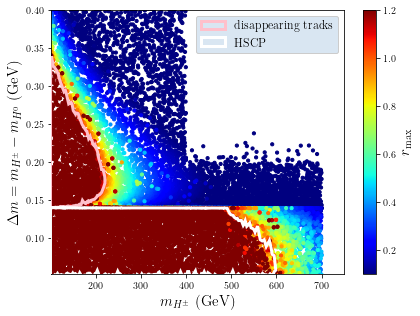

In [29]:
plt.figure(figsize=(6,4.5))
ax = plt.gca()
plt.scatter(df['mHc'],df['deltaM'],c=df['rmax'],alpha=1,cmap='jet',vmax=1.2,vmin=.1, s=10)
plt.scatter(compressed['mHc'],compressed['deltaM'],c=compressed['rmax'],alpha=1,cmap='jet',vmax=1.2,vmin=.1, s=10)
cb = plt.colorbar()
cb.set_label(label=r'$r_{\rm{max}}$', fontsize=15)

###Disappearing tracks
frame_analysis2d=dt[['mHc','deltaM']]
frame_analysis2d=frame_analysis2d.to_numpy()
alpha_shape = alphashape.alphashape(frame_analysis2d, .001)
ax.add_patch(PolygonPatch(alpha_shape, alpha=1,ec='pink',fill=False,zorder=20,lw=3,label='disappearing tracks'))

####Disappearing tracks with fermions
# frame_analysis2d=dtf[['mHc','deltaM']]
# frame_analysis2d=frame_analysis2d.to_numpy()
# alpha_shape = alphashape.alphashape(frame_analysis2d, .001)
# ax.add_patch(PolygonPatch(alpha_shape, alpha=1,ec='black',ls='--',fill=False,zorder=20,lw=3,label='DT fermions excl.'))

        
####HSCP
frame_analysis2d=hscp[['mHc','deltaM']]
frame_analysis2d=frame_analysis2d.to_numpy()
alpha_shape = alphashape.alphashape(frame_analysis2d, .001)
ax.add_patch(PolygonPatch(alpha_shape, alpha=1,ec='white',fill=False,zorder=20,lw=3,label='HSCP'))

lgd = plt.legend(loc='upper right',fontsize=12, facecolor='#d9e6f2', framealpha = 1.), 

# plt.text(200, 0.1, "HSCP exclusion", color='white', fontsize=15, ha='left', va='center')
# plt.annotate(xy=(150, 0.2), xytext=(405, 0.35), s="disappearing tracks\nexclusion", color='black', fontsize=15, 
#              arrowprops={'arrowstyle':'->'}, ha='left', va='center')

plt.ylim(0.053,0.4)
plt.xlim(101,750)
# plt.yscale('log')
# plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to (\pi^\pm\;\rm{or}\;ff') H^0}$",fontsize = 15)
plt.ylabel(r'$\Delta m = m_{H^\pm} - m_{H^0}$ (GeV)',fontsize = 15)
plt.xlabel(r'$m_{H^\pm}$ (GeV)',fontsize = 15)
plt.tight_layout()
file = os.path.join(path, "scalarDeltaM.png")
plt.savefig(file)
plt.show()

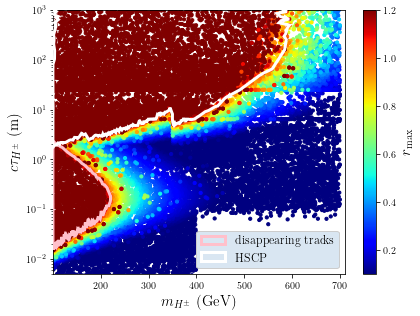

In [28]:
plt.figure(figsize=(6,4.5))
ax = plt.gca()
plt.scatter(df['mHc'],df['dHc'],c=df['rmax'],alpha=1,cmap='jet',vmax=1.2,vmin=.1, s=10)
plt.scatter(compressed['mHc'],compressed['dHc'],c=compressed['rmax'],alpha=1,cmap='jet',vmax=1.2,vmin=.1, s=10)
cb = plt.colorbar()
cb.set_label(label=r'$r_{\rm{max}}$', fontsize=15)

####Disappearing tracks
frame_analysis2d=dt[['mHc','dHc']]
frame_analysis2d=frame_analysis2d.to_numpy()
alpha_shape = alphashape.alphashape(frame_analysis2d, .01)
ax.add_patch(PolygonPatch(alpha_shape, alpha=1,ec='pink',fill=False,zorder=20,lw=3,label='disappearing tracks'))

####Disappearing tracks with fermions
# frame_analysis2d=dtf[['mHc','dHc']]
# frame_analysis2d=frame_analysis2d.to_numpy()
# alpha_shape = alphashape.alphashape(frame_analysis2d, .01)
# ax.add_patch(PolygonPatch(alpha_shape, alpha=1,ec='black',ls='--',fill=False,zorder=20,lw=3,label='dis. tracks fermions eff.'))
        
####HSCP
frame_analysis2d=hscp[['mHc','dHc']]
frame_analysis2d=frame_analysis2d.to_numpy()
# Function for varying the alpha parameter
def alf(ind, r):
    if any(frame_analysis2d[ind][:,0] < 200) and any(frame_analysis2d[ind][:,1] < 7):
        return .05
#     elif any(frame_analysis2d[ind][:,0] < 280) and any(frame_analysis2d[ind][:,1] < 10):
#         return .0002
    elif any(frame_analysis2d[ind][:,0] < 380) and any(frame_analysis2d[ind][:,1] < 10):
        return .3
    else:
        return .008                
                
alpha_shape = alphashape.alphashape(frame_analysis2d, alf)
ax.add_patch(PolygonPatch(alpha_shape, alpha=1,ec='white',fill=False,zorder=20,lw=3,label='HSCP'))

lgd = plt.legend(loc='lower right', fontsize=12, facecolor='#d9e6f2', framealpha = 1.)

# plt.text(175, 100, "HSCP exclusion", color='white', fontsize=15, ha='left', va='center')
# plt.annotate(xy=(150, 0.1), xytext=(300, 0.7), s="disappearing tracks\nexclusion", color='white', fontsize=15, 
#              arrowprops={'arrowstyle':'->', 'color':'white'}, ha='left', va='center')

plt.ylim(5e-3,1e3)
plt.xlim(101,710)
plt.yscale('log')
# plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to (\pi^\pm\;\rm{or}\;ff') H^0}$",fontsize = 25)
plt.ylabel(r'$c\tau_{H^\pm}$ (m)',fontsize = 15)
plt.xlabel(r'$m_{H^\pm}$ (GeV)',fontsize = 15)
plt.tight_layout()
file = os.path.join(path, "scalarWidth.png")
plt.savefig(file)
plt.show()

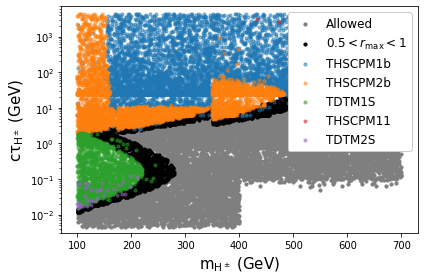

In [8]:
plt.figure(figsize=(6,4))
plt.scatter(ald['mHc'], ald['dHc'], color='tab:grey', label="Allowed", s=10)
plt.scatter(near['mHc'], near['dHc'], color='black', label=r"$0.5<r_{\rm{max}}<1$", s=10)
for topo in topos:
    toplot = excl[excl['bestTx']==topo]
    label = topo
    plt.scatter(toplot['mHc'], toplot['dHc'], label=label, alpha=0.5, s=10)


lgd = plt.legend(loc='upper right', framealpha=1.,fontsize=12)

plt.ylim(3E-3,7E3)
# plt.xlim(0,800)
plt.yscale('log')
# plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to (\pi^\pm\;\rm{or}\;ff') H^0}$",fontsize = 15)
plt.ylabel(r'$\mathregular{c\tau_{H^\pm}}$ (GeV)',fontsize = 15)
plt.xlabel(r'$\mathregular{m_{H^\pm}}$ (GeV)',fontsize = 15)
plt.tight_layout()
plt.show()

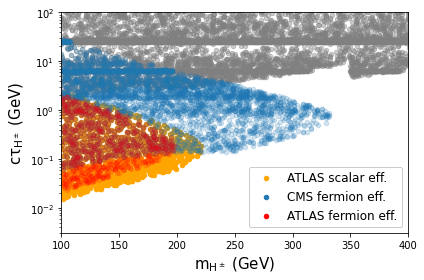

---slhas excluded by atlas scalar EM for which mHc > 225 GeV---


,mA0,mHc,mH0,deltaM,dHc,rmax,ana,rmax2,ana2,rmaxDT,rmaxHSCP,topo,bestTx,pions,slha


In [9]:
plt.figure(figsize=(6,4))
plt.scatter(hscp['mHc'], hscp['dHc'], s=20, color='grey', alpha=0.4)
plt.scatter(atlas['mHc'], atlas['dHc'], label=r"ATLAS scalar eff.", s=20, color='orange')
plt.scatter(cms['mHc'], cms['dHc'], label=r"CMS fermion eff.", s=20, alpha = 0.2, color='C0')
plt.scatter(atlasf['mHc'], atlasf['dHc'], label=r"ATLAS fermion eff.", s=20, color='red', alpha=0.15)


lgd = plt.legend(loc='lower right', framealpha=1.,fontsize=12)
for lh in lgd.legendHandles: 
    lh.set_alpha(1)

plt.ylim(3E-3,1E2)
plt.xlim(100,400)
plt.yscale('log')
# plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to (\pi^\pm\;\rm{or}\;ff') H^0}$",fontsize = 15)
plt.ylabel(r'$\mathregular{c\tau_{H^\pm}}$ (GeV)',fontsize = 15)
plt.xlabel(r'$\mathregular{m_{H^\pm}}$ (GeV)',fontsize = 15)
plt.tight_layout()
file = os.path.join(path, "DTcomparison.png")
plt.savefig(file)
plt.show()
print("---slhas excluded by atlas scalar EM for which mHc > 225 GeV---")
atlas[atlas['mHc']>225]

In [10]:
aldClose = ald[ald['mHc']>225]
aldClose = aldClose[aldClose['mHc']<245]
aldClose = aldClose[aldClose['dHc']>0.09]
aldClose = aldClose[aldClose['dHc']<0.11]
aldClose

,mA0,mHc,mH0,deltaM,dHc,rmax,ana,rmax2,ana2,rmaxDT,rmaxHSCP,topo,bestTx,pions,slha
21642,305.7141,244.3789,244.1773,0.2016,0.091854,0.659252,ATLAS-SUSY-2016-06,7.223142e-07,CMS-SUS-16-033,0.659252,2.770903e-07,"TDTM1S, TDTM2S",TDTM1S,True,idm-batch2-pt-256.slha
18000,282.8115,243.7038,243.5021,0.2017,0.091638,0.664373,ATLAS-SUSY-2016-06,2.978830e-07,ATLAS-SUSY-2016-07,0.664373,2.697672e-07,"TDTM1S, TDTM2S",TDTM1S,True,idm-batch1-pt-3777.slha
11643,255.4045,240.7634,240.5685,0.1949,0.105033,0.713665,ATLAS-SUSY-2016-06,3.326533e-07,ATLAS-SUSY-2016-32,0.713665,3.326533e-07,"TDTM1S, TDTM2S",TDTM1S,True,idm-batch1-pt-1401.slha
5634,317.4736,239.8329,239.6363,0.1966,0.101398,0.716266,ATLAS-SUSY-2016-06,7.157641e-07,CMS-SUS-16-033,0.716266,3.719357e-07,"TDTM1S, TDTM2S",TDTM1S,True,idm-batch1-pt-554.slha
4355,241.2762,234.5502,234.3536,0.1966,0.101527,0.768291,ATLAS-SUSY-2016-06,5.959620e-07,ATLAS-SUSY-2016-32,0.768291,5.959620e-07,"TDTM1S, TDTM2S",TDTM1S,True,idm-batch1-pt-2006.slha
20296,265.5192,233.7803,233.5870,0.1933,0.108722,0.789375,ATLAS-SUSY-2016-06,6.349889e-07,ATLAS-SUSY-2016-32,0.789375,6.349889e-07,"TDTM1S, TDTM2S",TDTM1S,True,idm-batch2-pt-2981.slha
27304,278.5262,232.1188,231.9214,0.1974,0.099933,0.790353,ATLAS-SUSY-2016-06,7.164341e-07,ATLAS-SUSY-2016-32,0.790353,7.164341e-07,"TDTM1S, TDTM2S",TDTM1S,True,idm-batch2-pt-2249.slha
27732,265.3197,229.9161,229.7152,0.2009,0.093199,0.799904,ATLAS-SUSY-2016-06,8.285078e-07,ATLAS-SUSY-2016-32,0.799904,8.285078e-07,"TDTM1S, TDTM2S",TDTM1S,True,idm-batch2-pt-1718.slha
4267,294.3242,226.9207,226.7217,0.1990,0.096880,0.841510,ATLAS-SUSY-2016-06,9.978397e-07,ATLAS-SUSY-2016-32,0.841510,9.978397e-07,"TDTM1S, TDTM2S",TDTM1S,True,idm-batch1-pt-1749.slha
11806,247.4382,226.7134,226.5145,0.1989,0.096947,0.844073,ATLAS-SUSY-2016-06,1.008922e-06,ATLAS-SUSY-2016-32,0.844073,1.008922e-06,"TDTM1S, TDTM2S",TDTM1S,True,idm-batch2-pt-208.slha


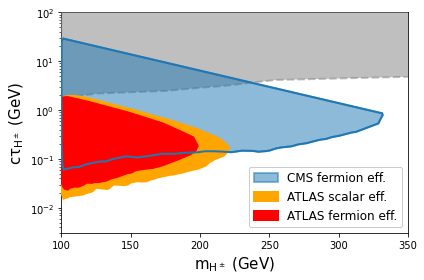

In [11]:
plt.figure(figsize=(6,4))
# plt.scatter(hscp['mHc'], hscp['dHc'],s=20, color='grey', alpha=0.2)
ax = plt.gca()
# plt.scatter(atlas['mHc'], atlas['dHc'], label=r"ATLAS-SUSY-2016-06 scalar eff.", s=20, color='orange')
# plt.scatter(cms['mHc'], cms['dHc'], label=r"CMS-EXO-19-010 fermions eff.", s=20, alpha = 0.2, color='C0')
# plt.scatter(atlasf['mHc'], atlasf['dHc'], label=r"ATLAS-SUSY-2016-06 fermion eff.", s=20, color='red', alpha=0.15)

frame_analysis2d=hscp[['mHc','dHc']]
frame_analysis2d=frame_analysis2d.to_numpy()
alphaHscp = alphashape.alphashape(frame_analysis2d, .0005)

frame_analysis2d=atlas[['mHc','dHc']]
frame_analysis2d=frame_analysis2d.to_numpy()
alphaAtlas = alphashape.alphashape(frame_analysis2d, .0005)

frame_analysis2d=atlasf[['mHc','dHc']]
frame_analysis2d=frame_analysis2d.to_numpy()
alphaFatlas = alphashape.alphashape(frame_analysis2d, .0005)

frame_analysis2d=cms[['mHc','dHc']]
frame_analysis2d=frame_analysis2d.to_numpy()
alphaCms = alphashape.alphashape(frame_analysis2d, .0005)

ax.add_patch(PolygonPatch(alphaHscp, alpha=.5,ec='grey',fc='grey',ls='--',fill=True,zorder=20,lw=3))
ax.add_patch(PolygonPatch(alphaCms, alpha=.5,ec='C0',fc='C0',fill=True,zorder=20,lw=3,label='CMS fermion eff.'))
ax.add_patch(PolygonPatch(alphaAtlas, alpha=1,ec='orange',fc='orange',fill=True,zorder=20,lw=3,label='ATLAS scalar eff.'))
ax.add_patch(PolygonPatch(alphaFatlas, alpha=1,ec='red',fc='red',fill=True,zorder=20,lw=3,label='ATLAS fermion eff.'))
ax.add_patch(PolygonPatch(alphaCms, alpha=1,ec='C0',fc='C0',fill=False,zorder=20,lw=3))

lgd = plt.legend(loc='lower right', framealpha=1.,fontsize=12)
# for lh in lgd.legendHandles: 
#     lh.set_alpha(1)

plt.ylim(3E-3,1E2)
plt.xlim(100,350)
plt.yscale('log')
# plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to (\pi^\pm\;\rm{or}\;ff') H^0}$",fontsize = 15)
plt.ylabel(r'$\mathregular{c\tau_{H^\pm}}$ (GeV)',fontsize = 15)
plt.xlabel(r'$\mathregular{m_{H^\pm}}$ (GeV)',fontsize = 15)
plt.tight_layout()
file = os.path.join(path, "DTcomparisonContour.png")
plt.savefig(file)
plt.show()

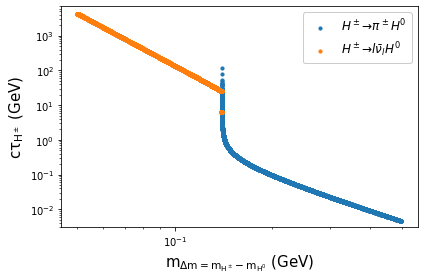

In [12]:
plt.figure(figsize=(6,4))
pions = df[df['pions']]
nopions = df[~df['pions']]
plt.scatter(pions['deltaM'], pions['dHc'], label=r"$H^\pm \to \pi^\pm H^0$", s=10)
plt.scatter(nopions['deltaM'], nopions['dHc'], label=r"$H^\pm \to l\bar{\nu}_l H^0$", s=10)



lgd = plt.legend(loc='upper right', framealpha=1.,fontsize=12)

plt.ylim(3E-3,7E3)
# plt.xlim(0,800)
plt.yscale('log')
plt.xscale('log')
# plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to (\pi^\pm\;\rm{or}\;ff') H^0}$",fontsize = 15)
plt.ylabel(r'$\mathregular{c\tau_{H^\pm}}$ (GeV)',fontsize = 15)
plt.xlabel(r'$\mathregular{m_{\Delta m = m_{H^\pm} - m_{H^0}}}$ (GeV)',fontsize = 15)
plt.tight_layout()
file = os.path.join(path, "hpWidth.png")
plt.savefig(file)
plt.show()

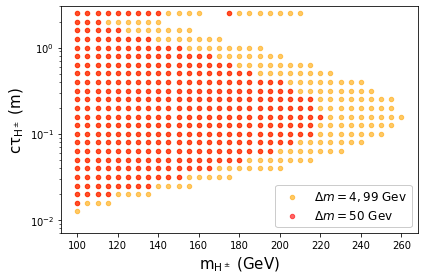

N dm005 508
N dm050 346
N dm100 345


In [13]:
simple = simple[simple['rmax'] > 1]
dm005 = simple[simple['mA0']-simple['mHc'] < 5]
dm050 = simple[simple['mA0']-simple['mHc'] == 50]
dm100 = simple[simple['mA0']-simple['mHc'] == 100]

plt.scatter(dm005['mHc'], dm005['dHc'], label=r"$\Delta m = 4,99$ Gev", s=20, alpha = .6, color='orange')
plt.scatter(dm050['mHc'], dm050['dHc'], label=r"$\Delta m = 50$ Gev", s=20, alpha = .6, color='red')
# plt.scatter(dm100['mHc'], dm100['dHc'], label=r"$\Delta m = 100$ Gev", s=20, alpha = 1, color='C0')
lgd = plt.legend(loc='lower right', framealpha=1.,fontsize=12)

plt.ylim(0.007,3)
# plt.xlim(90,260)
plt.yscale('log')
# plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to (\pi^\pm\;\rm{or}\;ff') H^0}$",fontsize = 15)
plt.ylabel(r'$\mathregular{c\tau_{H^\pm}}$ (m)',fontsize = 15)
plt.xlabel(r'$\mathregular{m_{H^\pm}}$ (GeV)',fontsize = 15)
plt.tight_layout()
file = os.path.join(path, "compressionComparison.png")
plt.savefig(file)
plt.show()
print('N dm005', len(dm005))
print('N dm050', len(dm050))
print('N dm100', len(dm100))

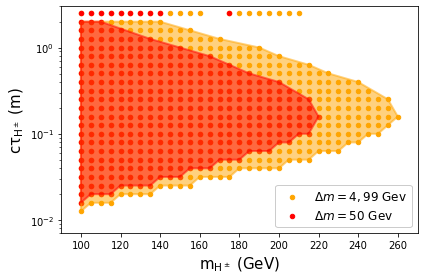

N dm005 487
N dm050 336
N dm100 345


In [14]:
plt.figure(figsize=(6,4))
ax = plt.gca()
plt.scatter(dm005['mHc'], dm005['dHc'], label=r"$\Delta m = 4,99$ Gev", s=20, alpha = 1, color='orange')
plt.scatter(dm050['mHc'], dm050['dHc'], label=r"$\Delta m = 50$ Gev", s=20, alpha = 1, color='red')
simple = simple[simple['dHc'] < 2.1]
dm005 = simple[simple['mA0']-simple['mHc'] < 5]
dm050 = simple[simple['mA0']-simple['mHc'] == 50]


frame_analysis2d=dm005[['mHc','dHc']]
frame_analysis2d=frame_analysis2d.to_numpy()
alpha005 = alphashape.alphashape(frame_analysis2d, .001)

frame_analysis2d=dm050[['mHc','dHc']]
frame_analysis2d=frame_analysis2d.to_numpy()
alpha050 = alphashape.alphashape(frame_analysis2d, .001)

ax.add_patch(PolygonPatch(alpha005, alpha=.5,ec='orange',fc='orange',fill=True,zorder=20,lw=3))
ax.add_patch(PolygonPatch(alpha050, alpha=.5,ec='red',fc='red',fill=True,zorder=20,lw=3))

lgd = plt.legend(loc='lower right', framealpha=1.,fontsize=12)

plt.ylim(0.007,3)
plt.xlim(90,270)
plt.yscale('log')
# plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to (\pi^\pm\;\rm{or}\;ff') H^0}$",fontsize = 15)
plt.ylabel(r'$\mathregular{c\tau_{H^\pm}}$ (m)',fontsize = 15)
plt.xlabel(r'$\mathregular{m_{H^\pm}}$ (GeV)',fontsize = 15)
plt.tight_layout()
file = os.path.join(path, "compressionComparisonContour.png")
plt.savefig(file)
plt.show()
print('N dm005', len(dm005))
print('N dm050', len(dm050))
print('N dm100', len(dm100))